# Motivação

O objetivo principal deste trabalho é estudar, entender e implementar as principais técnicas de análise e processamento de linguagem natural. Para que esse trabalho se torne possível, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

# Importar bibliotecas necessárias

In [1]:
import nltk

# Download de todos os componentes necessários da biblioteca NLTK

In [ ]:
nltk.download('all')
#nltk.download('stopwords')

# Criando as stopwords em português e inglês

In [3]:
english_stopwords = nltk.corpus.stopwords.words('english')

In [4]:
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

In [6]:
# Adiciona algumas stopwords em português para tratar algumas divergências analíticas
add_stopwords_pt = ['capitulo', 'capítulo']
portuguese_stopwords.extend(add_stopwords_pt)

# Criando a função de processamento de texto

O objetivo dessa função e remover as quebras de linhas e alguns caracteres especiais que não foram removidos com o decode

In [7]:
import re

def processing_text(str_text, _stopwords):
  text_format = re.findall(r'\b[A-zÀ-úü]+\b', str_text.lower())

  if _stopwords:
    no_stopwords = [words for words in text_format if words not in _stopwords and not len(words) == 1]
  else:
    no_stopwords = text_format

  return(' '.join(no_stopwords))

# Escolhendo os textos a serem utilizados na função de processamento e realizar leitura de arquivos armazenados no Google Drive

Foram utilizadas as os livros da escritora J. K. Rowling, especificamente a série do Harry Potter.

Para acessar os livros do Harry Potter que estão armazenados no Google Drive, vamos realizar a montagem do Drive para conseguir acessar como se fosse um repositório local de um PC.

**PS: Vamos realizar a montagem apenas uma vez a cada execução do algoritmo, para não gastar processamento desnecessário.**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Acessando o repositório que foi montado no Google Drive para coletar a lista de todos os livros da pasta.

In [9]:
import os

_path_books_drive = '/content/drive/MyDrive/Harry_Potter/'

list_books_hp = sorted(os.listdir(_path_books_drive))

list_books_hp

["Book 1 - The Philosopher's Stone.txt",
 'Book 2 - The Chamber of Secrets.txt',
 'Book 3 - The Prisoner of Azkaban.txt',
 'Book 4 - The Goblet of Fire.txt',
 'Book 5 - The Order of the Phoenix.txt',
 'Book 6 - The Half Blood Prince.txt',
 'Book 7 - The Deathly Hallows.txt']

Realizar a leitura de cada livro e passar o texto na função de processamento para remover pontuações e stopwords.

In [10]:
#Função responsável por tratar as informações textuais dos livros.
books_hp_no_processed = []
books_hp_processed = []
_footer_removed = []

for book in list_books_hp:
  if book.endswith('.txt'):
    with open(_path_books_drive + book, encoding='utf8') as f:
      _book = ''
      for line in f:
        if not line.startswith("Page |"):
            _book += line
        else:
          _footer_removed.append(line)
      
      books_hp_no_processed.append(_book)
      books_hp_processed.append(processing_text(_book, english_stopwords))

Print do texto sem processamento e com o processamento da função.

In [ ]:
books_hp_no_processed[0]

In [ ]:
books_hp_processed[0]

In [ ]:
for i in _footer_removed:
  if "Goblet" in i:
    print(i)

# Códigos de terminal baseados em Linux

É possível utilizar comandos Linux para navegar pelo diretório depois que ele foi montado no comando acima.

In [14]:
!dir /content/drive/MyDrive/Harry_Potter/

Book\ 1\ -\ The\ Philosopher's\ Stone.txt
Book\ 2\ -\ The\ Chamber\ of\ Secrets.txt
Book\ 3\ -\ The\ Prisoner\ of\ Azkaban.txt
Book\ 4\ -\ The\ Goblet\ of\ Fire.txt
Book\ 5\ -\ The\ Order\ of\ the\ Phoenix.txt
Book\ 6\ -\ The\ Half\ Blood\ Prince.txt
Book\ 7\ -\ The\ Deathly\ Hallows.txt


# Tokenização dos textos

A tokenização, também conhecida como segmentação de palavras, é responsável por quebrar as palavras de cada texto analisado, ou seja, ele identifica o início e o término das palavras do texto e faz a divisão.

- Exemplo sem tokenização: "Harry Potter é a melhor série de todos os tempos"

- Texto tokenizado: "Harry", "Potter", "é", "a", "melhor", "saga", "de", "todos", "os", "tempos"

In [15]:
# Frase fornecida como "input"
_str = 'Harry Potter é a melhor saga de todas!'

# Função em python para realizar a tokenização, utilizando a biblioteca NLTK
print(nltk.tokenize.word_tokenize(_str))

# Tokenização fornecida como "output"

['Harry', 'Potter', 'é', 'a', 'melhor', 'saga', 'de', 'todas', '!']


In [16]:
tokens_noprocess_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_no_processed[0])
tokens_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_processed[0])

In [17]:
tokens_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_processed[0])
tokens_hp_chamber_secrets = nltk.tokenize.word_tokenize(books_hp_processed[1])
tokens_hp_azkaban = nltk.tokenize.word_tokenize(books_hp_processed[2])
tokens_hp_goblet_fire = nltk.tokenize.word_tokenize(books_hp_processed[3])
tokens_hp_phoenix = nltk.tokenize.word_tokenize(books_hp_processed[4])
tokens_hp_prince = nltk.tokenize.word_tokenize(books_hp_processed[5])
tokens_hp_hallows = nltk.tokenize.word_tokenize(books_hp_processed[6])

In [ ]:
print(tokens_noprocess_hp_philosopher_stone)
print(tokens_hp_philosopher_stone)

# Análise de frequência de palavras

Uma distribuição de frequência pode ser usada para registrar a frequência de cada tipo de palavra em um documento, ou seja, essa função tem por objetivo calcular a inscidencia de vezes que uma palavra foi mencionada em um texto, documento, string.

In [19]:
prob_hp_philosopher_stone = nltk.probability.FreqDist(tokens_hp_philosopher_stone)
prob_hp_chamber_secrets = nltk.probability.FreqDist(tokens_hp_chamber_secrets)
prob_hp_azkaban = nltk.probability.FreqDist(tokens_hp_azkaban)
prob_hp_goblet_fire = nltk.probability.FreqDist(tokens_hp_goblet_fire)
prob_hp_phoenix = nltk.probability.FreqDist(tokens_hp_phoenix)
prob_hp_prince = nltk.probability.FreqDist(tokens_hp_prince)
prob_hp_hallows = nltk.probability.FreqDist(tokens_hp_hallows)

In [20]:
prob_hp_noprocess_philosopher_stone = nltk.probability.FreqDist(tokens_noprocess_hp_philosopher_stone)
prob_hp_philosopher_stone = nltk.probability.FreqDist(tokens_hp_philosopher_stone)

In [21]:
print(prob_hp_noprocess_philosopher_stone.most_common(5))
print(prob_hp_philosopher_stone.most_common(5))

[(',', 5658), ('.', 4642), ('the', 3312), ('’', 3111), ('“', 2437)]
[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 269)]


# Print das 10 palavras que mais se repetem nos textos

In [22]:
print(prob_hp_philosopher_stone.most_common(10))
print(prob_hp_chamber_secrets.most_common(10))
print(prob_hp_azkaban.most_common(10))
print(prob_hp_goblet_fire.most_common(10))
print(prob_hp_phoenix.most_common(10))
print(prob_hp_prince.most_common(10))
print(prob_hp_hallows.most_common(10))

[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 269), ('back', 261), ('one', 256), ('know', 214), ('got', 207), ('could', 198)]
[('harry', 1656), ('said', 1218), ('ron', 706), ('hermione', 320), ('back', 279), ('lockhart', 234), ('one', 222), ('malfoy', 222), ('could', 211), ('professor', 192)]
[('harry', 2049), ('said', 1477), ('ron', 791), ('hermione', 672), ('professor', 416), ('lupin', 408), ('black', 390), ('back', 353), ('one', 305), ('hagrid', 268)]
[('harry', 3171), ('said', 2638), ('ron', 1043), ('hermione', 871), ('dumbledore', 599), ('back', 589), ('mr', 523), ('around', 490), ('looked', 489), ('one', 488)]
[('harry', 4089), ('said', 3945), ('ron', 1307), ('hermione', 1307), ('back', 791), ('well', 664), ('dumbledore', 661), ('sirius', 646), ('could', 639), ('know', 604)]
[('harry', 2784), ('said', 2441), ('dumbledore', 1034), ('ron', 877), ('hermione', 694), ('could', 482), ('would', 456), ('back', 423), ('one', 409), ('well', 401)]
[('harry', 3

# Print das 10 palavras que menos se repetem nos textos

In [23]:
print(prob_hp_hallows.most_common()[-10:])

[('carriages', 1), ('boats', 1), ('friday', 1), ('sincere', 1), ('tactful', 1), ('bravest', 1), ('kisses', 1), ('reminders', 1), ('craned', 1), ('bereavement', 1)]


# Palavra que mais se repete

In [24]:
print('Palavra que mais se repete no texto de ' + list_books_hp[0] + ': ' + prob_hp_philosopher_stone.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[1] + ': ' + prob_hp_chamber_secrets.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[2] + ': ' + prob_hp_azkaban.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[3] + ': ' + prob_hp_goblet_fire.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[4] + ': ' + prob_hp_phoenix.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[5] + ': ' + prob_hp_prince.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[6] + ': ' + prob_hp_hallows.max())

Palavra que mais se repete no texto de Book 1 - The Philosopher's Stone.txt: harry
Palavra que mais se repete no texto de Book 2 - The Chamber of Secrets.txt: harry
Palavra que mais se repete no texto de Book 3 - The Prisoner of Azkaban.txt: harry
Palavra que mais se repete no texto de Book 4 - The Goblet of Fire.txt: harry
Palavra que mais se repete no texto de Book 5 - The Order of the Phoenix.txt: harry
Palavra que mais se repete no texto de Book 6 - The Half Blood Prince.txt: harry
Palavra que mais se repete no texto de Book 7 - The Deathly Hallows.txt: harry


# Plot gráfico das análises feitas com as informações tratadas

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
#Filtra a quantidade de palavras por livro.
def filter_book(book, count, num_book):
  words = []
  count_words = []
  for i in book.most_common(count):
    words.append(i[0])
    count_words.append(i[1])
  
  return {'words': words, 'qtd_words': count_words, 'title': list_books_hp[num_book].replace('.txt', '')}

In [ ]:
#prob_hp_noprocess_philosopher_stone
#prob_hp_philosopher_stone

In [30]:
def plot_graph_dispersion(_book):
  colors = np.random.randint(60, size=(len(_book['qtd_words'])))
  
  plt.figure(figsize=(10,4)).patch.set_facecolor((1, 1, 1))
  plt.scatter(np.array(_book['words']), np.array(_book['qtd_words']), c=colors, s=_book['qtd_words'], alpha=0.5)

  plt.xlabel("Palavras")
  plt.ylabel("Quantidade")
  plt.title(_book['title'])

  plt.grid(True)
  #plt.colorbar()
  plt.show()

In [31]:
def plot_graph_bar(_book):
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

  plt.figure(figsize=(8,4)).patch.set_facecolor((1, 1, 1))
  plt.bar(_book['words'], _book['qtd_words'], label=_book['words'], color=colors, alpha=0.5)

  plt.xlabel("Palavras")
  plt.ylabel("Quantidade")
  plt.title(_book['title'])

  #plt.grid(True)
  #plt.colorbar()
  plt.show()

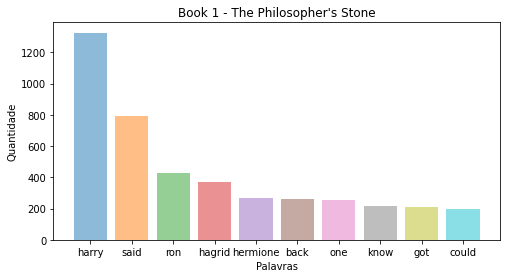

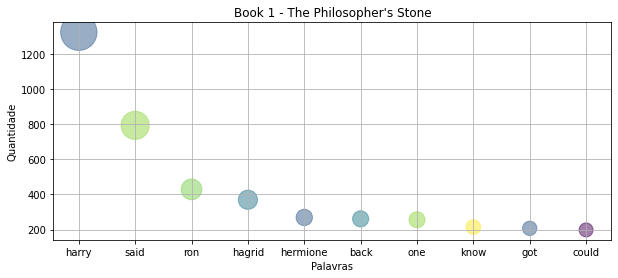

In [32]:
_book = filter_book(prob_hp_philosopher_stone, 10, 0)

#print(words, count_words)
plot_graph_bar(_book)
plot_graph_dispersion(_book)

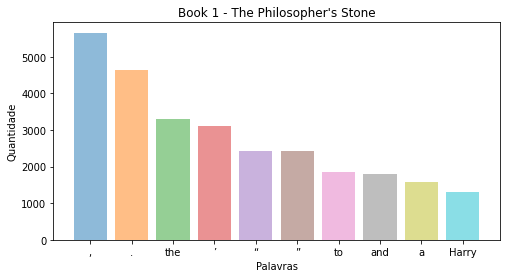

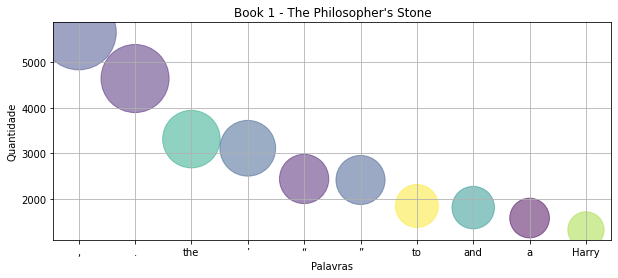

In [33]:
_book = filter_book(prob_hp_noprocess_philosopher_stone, 10, 0)

#print(words, count_words)
plot_graph_bar(_book)
plot_graph_dispersion(_book)

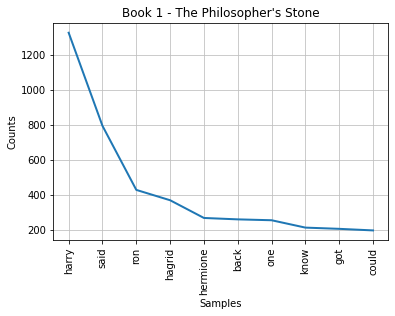

In [ ]:
prob_hp_philosopher_stone.plot(10, title=list_books_hp[0].replace('.txt', ''))

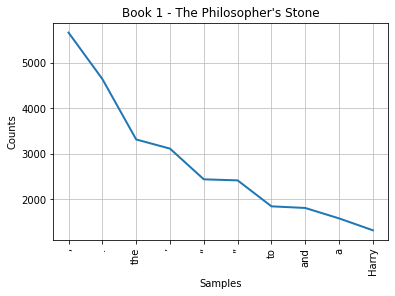

In [ ]:
prob_hp_noprocess_philosopher_stone.plot(10, title=list_books_hp[0].replace('.txt', ''))

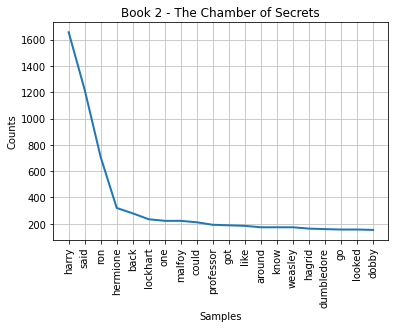

In [ ]:
prob_hp_chamber_secrets.plot(20, title=list_books_hp[1].replace('.txt', ''))

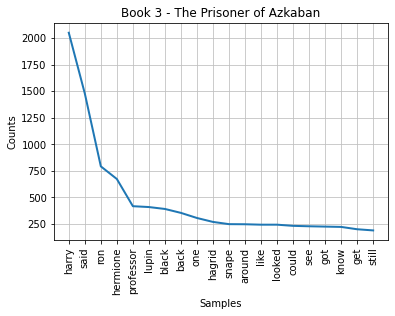

In [ ]:
prob_hp_azkaban.plot(20, title=list_books_hp[2].replace('.txt', ''))

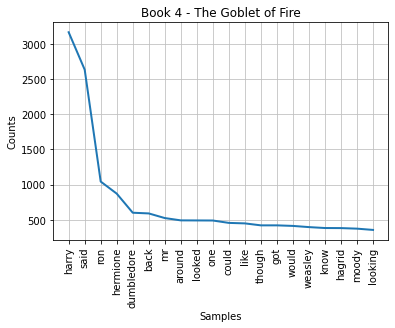

In [ ]:
prob_hp_goblet_fire.plot(20, title=list_books_hp[3].replace('.txt', ''))

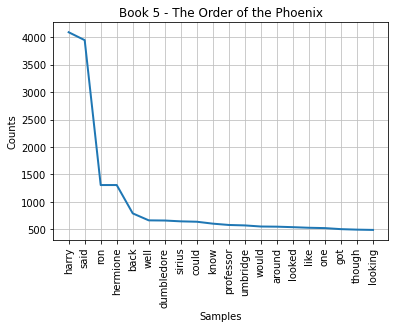

In [ ]:
prob_hp_phoenix.plot(20, title=list_books_hp[4].replace('.txt', ''))

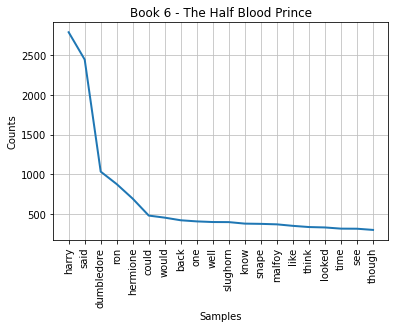

In [ ]:
prob_hp_prince.plot(20, title=list_books_hp[5].replace('.txt', ''))

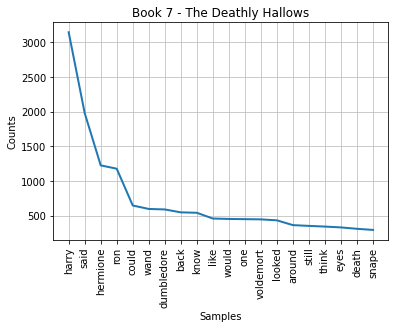

In [ ]:
prob_hp_hallows.plot(20, title=list_books_hp[6].replace('.txt', ''))

In [34]:
analytics_hp_philosopher_stone = nltk.Text(tokens_hp_philosopher_stone)
analytics_hp_chamber_secrets = nltk.Text(tokens_hp_chamber_secrets)
analytics_hp_azkaban = nltk.Text(tokens_hp_azkaban)
analytics_hp_goblet_fire = nltk.Text(tokens_hp_goblet_fire)
analytics_hp_phoenix = nltk.Text(tokens_hp_phoenix)
analytics_hp_prince = nltk.Text(tokens_hp_prince)
analytics_hp_hallows = nltk.Text(tokens_hp_hallows)

# Palavras similares

In [35]:
analytics_hp_philosopher_stone.similar('harry')

ron hagrid hermione said malfoy would dumbledore neville snape got get
right voldemort whispered yeh quirrell boy say dudley yes


In [36]:
analytics_hp_chamber_secrets.similar('basilisk')

said snake serpent


In [37]:
analytics_hp_azkaban.similar('lupin')

harry hermione ron trelawney mcgonagall dumbledore snape hagrid fudge
witch well fred george quietly malfoy flitwick lavender listen come us


In [38]:
analytics_hp_goblet_fire.similar('cedric')

harry ron hermione dumbledore said fred hagrid yeah bagman dobby see
saw got looked know yes wand sirius bill krum


In [39]:
analytics_hp_phoenix.similar('bellatrix')

hermione harry ron dumbledore behind see know yes corner nothing lives
good want owl sirius laughing yeah weak noticed er


In [40]:
analytics_hp_prince.similar('snape')

harry dumbledore slughorn hermione ron scrimgeour said yes malfoy
mcgonagall nothing voldemort tonks fred ginny lupin ogden thought
looking made


In [41]:
analytics_hp_hallows.similar('voldemort')

harry hermione said dumbledore ron bellatrix lupin wanted felt wand
going think snake say knew doge familiar saw really quietly


# Palavras dentro de diferentes contextos

In [42]:
analytics_hp_philosopher_stone.concordance('stone')

Displaying 25 of 80 matches:
snakes crawling slithering bits wood stone dudley piers wanted see huge poisono
ll hagrid folded newspaper clambered stone steps onto street passersby stared l
lin said hagrid quietly walked white stone steps toward goblin head shorter har
rry expected marble surprised narrow stone passageway lit flaming torches slope
ss right shadow castle walked flight stone steps crowded around huge oak front 
l big could fit whole dursleys house stone walls lit flaming torches like ones 
 professor mcgonagall across flagged stone floor harry could hear drone hundred
ul known draught living death bezoar stone taken stomach goat save poisons monk
n twisted blob potion seeping across stone floor burning holes people shoes wit
issed ron pulling harry behind large stone griffin peering around however saw p
ed dramatically known maker sorcerer stone quite effect expected said harry ron
dy alchemy concerned making sorcerer stone legendary substance astonishing powe
gendary sub

In [43]:
analytics_hp_chamber_secrets.concordance('basilisk')

Displaying 25 of 31 matches:
ters roam land none curious deadly basilisk known also king serpents snake may
ndrous aside deadly venomous fangs basilisk murderous stare fixed beam eye sha
 suffer instant death spiders flee basilisk mortal enemy basilisk flees crowin
spiders flee basilisk mortal enemy basilisk flees crowing rooster fatal beneat
on breathed answer monster chamber basilisk giant serpent hearing voice place 
seltongue harry looked beds around basilisk kills people looking one died one 
oked straight eye colin saw camera basilisk burned film inside colin got petri
 petrified justin justin must seen basilisk nearly headless nick nick got full
ror next hermione realized monster basilisk bet anything warned first person m
e chamber opened spiders flee fits basilisk getting around place said ron gian
ool heir slytherin one controlling basilisk going said ron whose eyes flashing
ng try get chamber tell think tell basilisk harry think anything else wanted s
tood listening chill si

In [44]:
analytics_hp_azkaban.concordance('azkaban')

Displaying 25 of 46 matches:
ossibly infamous prisoner ever held azkaban fortress still eluding capture mini
 ead cos mad inee ern inee mad went azkaban said ern slow voice blow meself set
ure black gaunt face never breakout azkaban ern beats ow frightenin eh mind fan
ow frightenin eh mind fancy chances azkaban guards eh ern ernie suddenly shiver
ered talk summat else stan good lad azkaban guards give collywobbles stan put p
nflating aunt marge bad enough land azkaban harry know anything wizard prison t
et impatiently accident send people azkaban blowing aunts tally harry past deal
cloak oh heard well yet matter time azkaban guards never yet failed angrier eve
 personally let children alone back azkaban harry homework blankets flashlight 
ing caught thirteen year old wizard azkaban guards get back mark words moment m
lack mad maybe clever enough escape azkaban supposed impossible month one seen 
rry perfectly safe hogwarts thought azkaban perfectly safe black break azkaban 
 azkaban pe

In [45]:
analytics_hp_goblet_fire.concordance('cedric')

Displaying 25 of 268 matches:
ol magical creatures think know son cedric cedric diggory extremely handsome b
cal creatures think know son cedric cedric diggory extremely handsome boy arou
use quidditch team hogwarts hi said cedric looking around everybody said hi ba
 merely nodded never quite forgiven cedric beating team gryffindor first quidd
atch previous year long walk arthur cedric father asked bad said mr weasley li
emained silent fred george scowling cedric looked slightly embarrassed harry f
 harry looked mr weasley mr diggory cedric still standing though looking winds
rd scrubby brown beard amos diggory cedric father stunners went right trees go
emerging crowd eyes gleaming wonder cedric knows think go tell cedric said ron
g wonder cedric knows think go tell cedric said ron blankly ernie hurried digg
 parchment hogwarts champion called cedric diggory said ron loudly nobody hear
puff jumped feet screaming stamping cedric made way past grinning broadly head
hind teachers table in

In [46]:
analytics_hp_phoenix.concordance('bellatrix')

Displaying 25 of 53 matches:
er small round burn mark two names bellatrix narcissa andromeda sisters still m
y looking name left andromeda burn bellatrix black connected double line rodolp
ius shortly harry looked curiously bellatrix husband rodolphus came barty crouc
her rabastan harry remembered seen bellatrix lestrange inside dumbledore pensie
rial witnessed dumbledore pensieve bellatrix lestrange looks kreacher favorite 
y dumbledore told promised mention bellatrix lestrange got sent azkaban using c
s curse neville parents lost minds bellatrix lestrange whispered hermione horri
thing perhaps azkaban taken beauty bellatrix lestrange convicted torture perman
dline pictures harry concentrating bellatrix yet read mass breakout azkaban min
y individuals include black cousin bellatrix lestrange rallied around black lea
d kept quiet said anything subject bellatrix fellow torturers escape fact barel
 yeah said harry tearing eyes away bellatrix lestrange face glance high street 
 crumple ho

In [47]:
analytics_hp_prince.concordance('unbreakable')

Displaying 8 of 8 matches:
d lips protect severus swear make unbreakable vow unbreakable vow snape express
everus swear make unbreakable vow unbreakable vow snape expression blank unread
and certainly narcissa shall make unbreakable vow said quietly perhaps sister c
d harry thought heard sob slammed unbreakable vow snow swirling icy windows chr
p swore mother would protect made unbreakable vow draco looks like break need p
omised malfoy mother protect made unbreakable oath something unbreakable vow sa
t made unbreakable oath something unbreakable vow said ron looking stunned nah 
s sure said harry mean well break unbreakable vow worked much funnily enough ha


In [48]:
analytics_hp_hallows.concordance('voldemort')

Displaying 25 of 446 matches:
emed emit pearly glow severus said voldemort indicating seat immediate right ya
s eyes around table followed snape voldemort spoke first lord order phoenix int
fened others fidgeted gazing snape voldemort saturday nightfall repeated voldem
demort saturday nightfall repeated voldemort red eyes fastened upon snape black
e snape however looked calmly back voldemort face moment two voldemort lipless 
mly back voldemort face moment two voldemort lipless mouth curved something lik
ley leaned forward look long table voldemort snape faces turned lord heard diff
rd heard differently yaxley waited voldemort speak went dawlish auror let slip 
e wheezy giggle echoed along table voldemort laugh gaze wandered upward body re
ire party aurors used transfer boy voldemort held large white hand yaxley subsi
xley subsided watching resentfully voldemort turned back snape going hide boy n
nchantments break rest well yaxley voldemort called table firelight glinting st
isted face

# Bigramas de texto

In [49]:
analytics_hp_philosopher_stone.collocations()

uncle vernon; professor mcgonagall; aunt petunia; said ron; said
hagrid; said harry; crabbe goyle; privet drive; common room; fred
george; madam pomfrey; mrs dursley; invisibility cloak; mrs norris;
nimbus two; madam hooch; nicolas flamel; leaky cauldron; first years;
sorcerer stone


In [50]:
analytics_hp_chamber_secrets.collocations()

professor mcgonagall; said ron; uncle vernon; mrs weasley; chamber
secrets; fred george; headless nick; said harry; madam pomfrey; nearly
headless; harry potter; gilderoy lockhart; moaning myrtle; aunt
petunia; hospital wing; mrs norris; common room; sorting hat;
professor sprout; crabbe goyle


In [51]:
analytics_hp_azkaban.collocations()

uncle vernon; professor mcgonagall; professor trelawney; professor
lupin; aunt marge; said ron; madam pomfrey; common room; said harry;
crabbe goyle; fred george; ron hermione; expecto patronum; sirius
black; hospital wing; said hermione; mrs weasley; invisibility cloak;
dark arts; aunt petunia


In [52]:
analytics_hp_goblet_fire.collocations()

madame maxime; mrs weasley; uncle vernon; rita skeeter; said ron;
professor mcgonagall; death eaters; said harry; fred george; world
cup; aunt petunia; said hermione; ron hermione; ludo bagman; daily
prophet; great hall; entrance hall; common room; crabbe goyle;
invisibility cloak


In [53]:
analytics_hp_phoenix.collocations()

mrs weasley; professor mcgonagall; said harry; uncle vernon; said
hermione; professor umbridge; fred george; death eaters; said ron;
aunt petunia; grubbly plank; department mysteries; daily prophet; dark
arts; ministry magic; common room; death eater; professor trelawney;
defense dark; ron hermione


In [54]:
analytics_hp_prince.collocations()

mrs weasley; prime minister; said harry; said dumbledore; death
eaters; professor mcgonagall; said hermione; dark lord; death eater;
common room; said ron; invisibility cloak; fred george; dark arts;
felix felicis; madam pomfrey; ron hermione; professor trelawney; room
requirement; lord voldemort


In [55]:
analytics_hp_hallows.collocations()

death eaters; mrs weasley; said harry; godric hollow; invisibility
cloak; said ron; death eater; ron hermione; said hermione; professor
mcgonagall; mad eye; phineas nigellus; elder wand; deathly hallows;
uncle vernon; dark lord; auntie muriel; fred george; beaded bag; bill
fleur


# Categorias - Filtro por gêneros - Etapa de testes

In [ ]:
from nltk.util import unique_list

In [ ]:
corpus = nltk.corpus.brown.tagged_sents(categories='mystery')
print(corpus)

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]


In [ ]:
tag_set = unique_list(tag for sent in corpus for (word,tag) in sent)
print(len(tag_set))

symbols = unique_list(word for sent in corpus for (word,tag) in sent)
print(len(symbols))

trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)

169
6982


In [ ]:
train_corpus = []
test_corpus = []
for i in range(len(corpus)):
     if i % 10:
         train_corpus += [corpus[i]]
     else:
         test_corpus += [corpus[i]]
print(len(train_corpus))

print(len(test_corpus))

3497
389


In [ ]:
pf = nltk.SimpleGoodTuringProbDist(prob_hp_philosopher_stone)

In [ ]:
pf.prob('potter')

0.0024613806443056444

In [ ]:
list(prob_hp_philosopher_stone._cumulative_frequencies(['harry']))

[1325.0]

In [ ]:
print(nltk.corpus.brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [ ]:
words_mystery = nltk.corpus.brown.words(categories='mystery')

categories = nltk.corpus.brown.categories()

words = nltk.corpus.brown.words()

print(len(words_mystery))

print(len(nltk.corpus.brown.words(categories='fiction')))

print(len(words))

57169
68488
1161192


In [ ]:
categories

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
for i in categories:
  print(i + ' => Words: ' + str(len(nltk.corpus.brown.words(categories=i))))

adventure => Words: 69342
belles_lettres => Words: 173096
editorial => Words: 61604
fiction => Words: 68488
government => Words: 70117
hobbies => Words: 82345
humor => Words: 21695
learned => Words: 181888
lore => Words: 110299
mystery => Words: 57169
news => Words: 100554
religion => Words: 39399
reviews => Words: 40704
romance => Words: 70022
science_fiction => Words: 14470


# Teste de leitura de informações coletadas em um site

In [ ]:
import urllib.request

#"https://www.gutenberg.org/files/68611/68611-0.txt"

text_web = urllib.request.urlopen("https://viniciusanl.github.io").read()

book_gutemberg = processing_text(str(text_web, 'utf8'), english_stopwords)

print(book_gutemberg)